
# DESAFIO - EDA - Pontuação de crédito de um Banco SaaS (PT e EN)
Detalhes

O desafio proposto pelo AceleraDev da Codenation é comparar os valores da média, mediana, moda e desvio padrão da pontuação de crédito para cada estado do dataset.

Entretanto, além do que foi proposto, fiquei curioso para saber o quais informações estes dados escondem e resolvi fazer uma análise mais profunda deste dataset(EDA: Análise exploratoria dos Dados). O que estes números levantados realmente podem nos dizer? Que tipos de informações relevantes conseguiríamos extrair deles e passar à àrea de negócios?

<img src="eda.png" width="460">

Para isto foi disponibilizado um dataset referente as informações de uma base de clientes de um banco SaaS. Abaixo segue o dicionário explicativo de cada variável:

‘id’: Identificador do cliente; ‘sobrenome’: Sobrenome do cliente; ‘pontuacao_credito’: Pontuação de crédito do cliente (quanto maior, melhor o cliente geralmente); 

‘estado_residencia’: Estado de residência do cliente; ‘genero’: Gênero do cliente; 

‘nivel_estabilidade’: Nível de estabilidade do cliente; ‘saldo_conta’: Saldo disponível na conta do cliente; 

‘numero_produtos’: Número de produtos que o cliente consome; ‘possui_cartao_de_credito’: Possui um cartão de crédito cadastrado; ‘membro_ativo’: Membro acessa e consome frequentemente.

--
### EN
The challenge proposed by Codenation's AceleraDev program  is compare the values of average, median, mode and standard deviation from de credit score to each state about this dataset.
However, beyond the proposal, I was curious to know more about this dataset and what information it hid. So I decided to do a deeply analysis about them (EDA: Exploratory data Analysis). What these numbers can really teel us? What kind of relevant informations we can extract from them and show to the business area?
In order to get the anwser, was given to us a dataset which contains informations about customers of a SaaS Bank. Below has the dictionary with the explanation of the each variable.

‘id’: customer identification; ‘sobrenome’: surname, ‘pontuacao_credito’: customer credit score  (bigger, generally the customer is better); 

‘estado_residencia’: State of residence; ‘genero’: gender; 

‘nivel_estabilidade’: customer stability level; ‘saldo_conta’: customer account balance available; 

‘numero_produtos’: number of products the customer consumes; ‘possui_cartao_de_credito’: if the customer has a credit card; ‘membro_ativo’: active member - If the customer is an active member.

========

Antes de tudo, vamos importar os pacotes necessários para a nossa análise.
Iremos importar o dataset com os dados e daremos uma olhadas nas primeiras linhas para averiguar que tipos de informações temos. 

--

First of all, let's import the necessary packages to do our analysis.
We will import the dataset and will look the first rows to see what kind of informations do We have.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("desafio1.csv")
df.head()

,RowNumber,id,sobrenome,pontuacao_credito,estado_residencia,genero,idade,nivel_estabilidade,saldo_conta,numero_produtos,possui_cartao_de_credito,membro_ativo
0,1,e7f44fcbd380d4cef7e6c232cc7e37895c3fd197,6d6e0aa1b9b413e442e2fb68df14b4fc3f91de50,619,SC,F,42,2,0.00,1,1,1
1,2,28dcb083ad90512da16b9430085c2cddb8ca5e12,48e1ad846796fa314f1b4a6702b83343eb5482c5,608,RS,F,41,1,83807.86,1,0,1
2,3,774bc378f787438c9c7594e536787d07a097a54b,f2b29d5d934de615812b697132e767dea0f1e9e2,502,SC,F,42,8,159660.80,3,1,0
3,4,043a71326f7096de155e7f0c559dc62b5e4b7239,85d5c9da7cddd8109ad32a6c348fe2bb10bf99f2,699,SC,F,39,1,0.00,2,0,0
4,5,37b3bb8ca243955fb3605ec7e1c2a4607cdb3b22,ddc89c837a6933639de75f28171057060bd322df,850,RS,F,43,2,125510.82,1,1,1


Como podemos ver rapidamente, temos duas colunas que são desnecessárias: 'RowNumber'(que deveria ser um indice antigo) e 'sobrenome'(porém, como temos também o 'id' este nos basta). Por isso, excluiremos elas do nosso dataset.

--

As We can see quickly, We have two unnecessary columns: 'RowNumber' (should be a old index) and 'sobrenome'(but, as we have  'id' colum too, it is enough). Therefore, We will drop them from our dataset.

In [3]:
df.drop(columns=["RowNumber", "sobrenome"], inplace=True)
df.head()

,id,pontuacao_credito,estado_residencia,genero,idade,nivel_estabilidade,saldo_conta,numero_produtos,possui_cartao_de_credito,membro_ativo
0,e7f44fcbd380d4cef7e6c232cc7e37895c3fd197,619,SC,F,42,2,0.00,1,1,1
1,28dcb083ad90512da16b9430085c2cddb8ca5e12,608,RS,F,41,1,83807.86,1,0,1
2,774bc378f787438c9c7594e536787d07a097a54b,502,SC,F,42,8,159660.80,3,1,0
3,043a71326f7096de155e7f0c559dc62b5e4b7239,699,SC,F,39,1,0.00,2,0,0
4,37b3bb8ca243955fb3605ec7e1c2a4607cdb3b22,850,RS,F,43,2,125510.82,1,1,1


### Informações básicas (Basic Informations)


In [4]:
df.shape

(7000, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        7000 non-null   object 
 1   pontuacao_credito         7000 non-null   int64  
 2   estado_residencia         7000 non-null   object 
 3   genero                    7000 non-null   object 
 4   idade                     7000 non-null   int64  
 5   nivel_estabilidade        7000 non-null   int64  
 6   saldo_conta               7000 non-null   float64
 7   numero_produtos           7000 non-null   int64  
 8   possui_cartao_de_credito  7000 non-null   int64  
 9   membro_ativo              7000 non-null   int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 547.0+ KB


In [6]:
df.duplicated().sum()

0

Olhando para as 3 linhas acima já temos informações bem interessantes:
a) nosso dataset possui 7000 observações(linhas)
b) não há nenhum valor nulo (graças a Deus, rs) ou seja, poderemos aproveitar bem todos os dados que nos foram disponibilizados
c) não há dados duplicados (idem)

--

Looking at the 3 rows above, We have interesting informations:
a) Our dataset has 7000 observations (rows);
b) It hasn't null values (thanks God, rs) because It means that we can utilize well all Our data;
c) It hasn't duplicated values (idem). 

In [7]:
df.describe()

,pontuacao_credito,idade,nivel_estabilidade,saldo_conta,numero_produtos,possui_cartao_de_credito,membro_ativo
count,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,649.787000,38.892714,5.010286,76471.883751,1.526000,0.703286,0.512143
std,97.046279,10.465562,2.887500,62403.383911,0.583047,0.456842,0.499888
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,582.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000
50%,651.000000,37.000000,5.000000,97277.130000,1.000000,1.000000,1.000000
75%,717.000000,44.000000,7.250000,127537.155000,2.000000,1.000000,1.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000


Aqui, na "descrição" dos valores podemos tirar alguns insights bacanas também:
a) em 'pontuacao_credito' vemos que o valor mínimo é 350 e o máximo é 850, além de eles estarem bem distribuidos pela quantidade de observações que temos (isso pode ser observado pelos quantis [25%,50%,75%];
b) em 'idade' vemos que a pessoa mais jovem tem 18 anos (o que nos mostra que atualmente, pessoas mais jovens já passam a ter certa independência para talvez ter uma conta, movimentações financeiras, compras. E, a pessoa mais velha possui 92 anos, o que nos mostra também que as pessoas tendem a cuidar das suas contas até o fim da vida;
c) em 'saldo_conta' nos surpreende que 50% dos nossos consumidores não possuem nada em suas contas;

--

Here, in 'describe' of de values We can take some good insights too.:
a) in 'pontuacao_credito' We can see that the minimum value is 350 and the maximum is 850, they are also well distributed in the quantis;
b) in 'idade' we see that the yougest person is 18 (What we can can infer is that nowadays, the youngest people have a little independence of their parents to  have their own credit card, to shopping, to deal with their own money. We can also notice the oldest person is 92 years old, what show us that the people tendency to take care about your business until the end of the live.
c) in 'saldo_conta', it suprise us because 50% of our customers don't has nothing of money in their acounts. 

### 1) Quais são os top 5 consumidores e os 5 piores? ( Who are the top 5  customers and the 5 worst?)

Quando queremos ordenar o nosso dataset para poder saber quem são os primeiros e os ultimos, primeiro, precisamos passar um parâmetro para ele se basear, neste caso, o nosso ponto principal: "pontuacao_credito". Entretanto, se fizermos a chamada do código ele nos trará valores "aleatórios" já que temos varias observações com o mesmo valor - 850. Portanto, iremos ver quais variáveis tem maior correlação com nossa variável principal para podermos ordena-las em conjunto e ter de fato os melhores e os piores consumidores da nossa base. 

--

When We want order our dataset to findout who are the first and the last customers, first of all We need pass a base parameter, in this case is "pontuacao_credito". However, if We call the code, it will bring us a random values, because We have a lot of observationos with the max value - 850. That is why We'll see which variables has more correlation with our main variable to order them togheter and achieve in fact the better and the worst customers of our dataset.  

In [8]:
df.corr()[["pontuacao_credito"]].sort_values(by ="pontuacao_credito", ascending=False)

,pontuacao_credito
pontuacao_credito,1.000000
membro_ativo,0.033992
saldo_conta,0.009761
nivel_estabilidade,0.007233
numero_produtos,0.000996
idade,-0.002839
possui_cartao_de_credito,-0.007987


In [9]:
df.sort_values(by=["pontuacao_credito","membro_ativo", "saldo_conta", "nivel_estabilidade"], ascending=False ).head(5)

,id,pontuacao_credito,estado_residencia,genero,idade,nivel_estabilidade,saldo_conta,numero_produtos,possui_cartao_de_credito,membro_ativo
1533,72c55878ee9abd82660989323055aef606481dd0,850,SC,F,37,3,212778.20,1,0,1
4533,c447e6f8d4c22e56157c76bd384a02b9cd07685a,850,RS,M,39,6,206014.94,2,0,1
4674,631d97f5beb62957142c1236017f7ff4aab85668,850,PR,M,41,1,176958.46,2,0,1
2651,699a2e173e71ae27ae7b09d0ca97f5f97b080359,850,PR,M,40,4,166082.15,2,0,1
1164,9c53560aff23f1d0512844168e20b6d3f0fd2b3e,850,SC,F,36,0,164850.54,1,1,1


In [10]:
df.sort_values(by=["pontuacao_credito","membro_ativo", "saldo_conta", "nivel_estabilidade"], ascending=False ).tail(5)

,id,pontuacao_credito,estado_residencia,genero,idade,nivel_estabilidade,saldo_conta,numero_produtos,possui_cartao_de_credito,membro_ativo
1405,beb638efbd03de9ede379f3739d50ec48b0f2d13,359,SC,F,44,6,128747.69,1,1,0
1962,9845bcad8c344f77e1ec09fc881c350e64fb0387,358,RS,F,52,8,143542.36,3,1,0
2473,5abb6d268316a919fce032e62ce1d470a74250ac,351,PR,F,57,4,163146.46,1,1,0
1631,6833c836918b1d92da40924d1ce30791c480a3aa,350,RS,M,54,1,152677.48,1,1,1
1838,3e5095801cc675bfa0bcf752e73c7206e65b66ea,350,PR,M,39,0,109733.20,2,0,0


Agora sim nós temos para apresentar à àrea de negócios quem são, desta nossa base, quem são os melhores e piores clientes. Uma coisa que logo de cara nos chama atenção é o nível de correlação das variáveis com a variável principal - eles são baixíssimos, sinceramente, são o menor nível de correlação que já vi, sem dúvida é algo que deve ser investigado. Poderíamos pedir uma outra base dos dados para fazer a mesma análise e entender se é um caso isolado ou se acontece para todo o negócio e devemos descobrir, se não são estas as variáveis que aumentam ou diminuem a pontuação dos consumidores, quais são?

Pontos que nos chama atenção também é a idade: os melhores possuem uma idade média mais jovem do que os piores. 4 dos 5 melhores não possui cartão de crédito, em contra-partida 4 dos 5 piores o tem - levando em conta que o negócio é um banco, é um fato no mínimo estranho. Outro ponto que vemos é que os últimos possuem valores relevantes na conta (mesmo sabendo que metade dos nossos consumidores não tem nada) e também tem a aquisição de alguns produtos, o que estes últimos não têm é atividade constante, o que nos mostra ser uma variável mais relevante que as outras juntas. 

--

Now We have the right informations, about this dataset, to present to the business area. What take our attention in the beginning is correlation level of the variables with the main variable - they are so lowest - honestly, is the lowest levels that I ever seen and without doubt must be investigated. We could ask another dataset to do the same analysis and understand if it is a isolatate case or if it happens to all the business, and so, find out, if arent these the variables that havem correlation with the main variable, which are?

Another point that take our attention is 'idade': the top customers are in general younger than the worst customers. But, 4 of the 5 best haven't credit card, in the other side, 4 of the 5 worst have - taking on count that the business is a bank, it is a minimum strange fact. Another strange point is that the last have relevant values of money in their acounts (and We know that the half of our customers don't have nothing) and They have the acquisted some products. The only thing that the last don't have is a constant activity, what show us that it is a more relevant variable than the anothers. 

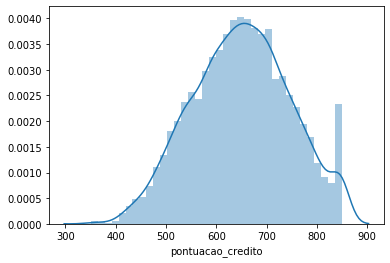

In [11]:
"""
Vamos dar uma olhada nas distribuições da nossa variável target.

----------

Let's look in the distribution of our target variable.
""" 
    
sns.distplot(df["pontuacao_credito"])

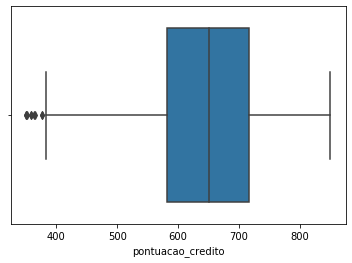

In [12]:
sns.boxplot(df["pontuacao_credito"])

Podemos ver que nossos dados são bem distribuidos como concluídos anteriormente, possuindo quase uma distribuição normal, com uma leve inclinação de assimetria à esquerda. Outro ponto que foge a distribuição normal é que temos muitos valores máximos. 

--

We can see that Our data have a good distribution as We concluded before and it has an almost normal distribution, with a slight asymmetry slope to the left. Another out point is because we have a lot of max values.  

### 2) Homens possuem pontuação maior que mulher? (Men has score bigger than women?)

Vamos ver se há uma diferença grande entre os gêneros e descobrir qual possue maiores pontuações. 

Primeiro, veremos o quanto de homens e mulheres temos, depois, vamos ver a frequência que temos de cada pontuação e a média desses valores. Por fim, vamos entender também a distribuição delas e comparar ambas.

--

Let's see if we have a big difference between the genders and find out which has the biggest ponctuations.

First of all, let's see how many of men and women We have, then, find out the frequency that each pontuatuion has in each gender and the average of them. In the end, let's understand each distribution and compare them too.

In [13]:
quantidade = df.genero.value_counts()
percentual =((df.genero.value_counts() / df.shape[0]) * 100).round(2)
quantidades = pd.DataFrame({"Quantidade":quantidade, "Percentual %":percentual})
quantidades

,Quantidade,Percentual %
M,3791,54.16
F,3209,45.84


In [14]:
count_f = df.query("genero == 'F'").groupby("genero")["pontuacao_credito"].value_counts().sort_values(ascending=False)
count_m = df.query("genero == 'M'").groupby("genero")["pontuacao_credito"].value_counts().sort_values(ascending=False)

count_f, count_m

(genero  pontuacao_credito
 F       850                  75
         655                  26
         554                  23
         652                  23
         678                  22
                              ..
         363                   1
         359                   1
         358                   1
         351                   1
         848                   1
 Name: pontuacao_credito, Length: 429, dtype: int64,
 genero  pontuacao_credito
 M       850                  92
         667                  23
         656                  21
         663                  21
         696                  21
                              ..
         405                   1
         401                   1
         399                   1
         365                   1
         845                   1
 Name: pontuacao_credito, Length: 432, dtype: int64)

In [15]:
df.groupby("genero")["pontuacao_credito"].mean().sort_values(ascending=False).round(2)

genero
M    650.79
F    648.61
Name: pontuacao_credito, dtype: float64

<Figure size 1080x432 with 0 Axes>

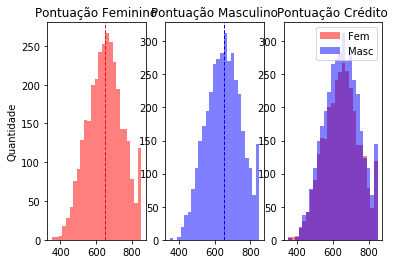

In [16]:
score_f = df.query("genero == 'F'")["pontuacao_credito"]
score_m = df.query("genero == 'M'")["pontuacao_credito"]

plt.figure(figsize=(15,6))

fig, axs = plt.subplots(1,3)

axs[0].set_title('Pontuação Feminino')
axs[0].set_ylabel('Quantidade')
axs[0].hist(score_f, bins=25, alpha=0.5, color="r", label="Fem")
axs[0].axvline(score_f.mean(), color='r', linestyle='dashed', linewidth=1)


axs[1].set_title('Pontuação Masculino')
axs[1].hist(score_m, bins=25, alpha=0.5, color="b", label="Pontuação Masculino")
axs[1].axvline(score_m.mean(), color='b', linestyle='dashed', linewidth=1)

axs[2].set_title('Pontuação Crédito')
axs[2].hist(score_f, bins=25, alpha=0.5, color="r", label="Fem")
axs[2].hist(score_m, bins=25, alpha=0.5, color="b", label="Masc")
axs[2].legend(loc='upper right')


plt.show()

Conforme os dados acima, vemos que de fato os homens possuem uma pontuação em geral maior que as mulheres, entretanto, algo interessante que podemos inferir também através destes mesmos dados é de que, como os valores são muito próximos um do outro, fica claro de que as mulheres passam a ter uma representatividade maior. E, o que antes viamos ser mais comum, os homens tratarem de assuntos financeiros em casa por exemplo, as mulheres começam a ter esta frente também. 

--

According to data show us, in fact the men has - in general - a bigger score than women, however, something interesting that We can infer about this data is: how the value are so close one another, it's clear to us that the women become more representative in this midle. And, something that was more commonly before, men take care about the business of the house an example, We see that women pass to take this responsabilite too. 

### 3)Quais faixas etárias possuem mais consumidores (Which age groups have the most consumers)

Como em nosso dataset nós temos apenas as idades, precisamos fazer essa separação e criar uma nova variavél para podermos analisá-la. Então, vamos fazer isso e depois visualizar estes novos dados para respondermos quais idades nos são mais representativos.

--

Because of our dataset has just the ages, We need create a new variable with this groups to analyse them. So, let's do it and after visualize this new data to answer which ages are more representative to us. 

In [17]:
bins=[0, 25, 35, 45, 55, 65, 99]
labels=["18-25", "26-35", "36-45", "46-55", "56-65" ,"acima de 66"] 
df["faixa_etaria"] = pd.cut(df["idade"], bins=bins, labels=labels, include_lowest=True )
qtde_fx_etaria = df["faixa_etaria"].value_counts()
percent_fx_etaria = ((df["faixa_etaria"].value_counts() / df.shape[0])*100).round(2)
tabela = pd.DataFrame({"Quantidade":qtde_fx_etaria, "Percentual %":percent_fx_etaria})
tabela

,Quantidade,Percentual %
36-45,2621,37.44
26-35,2473,35.33
46-55,915,13.07
18-25,438,6.26
56-65,373,5.33
acima de 66,180,2.57


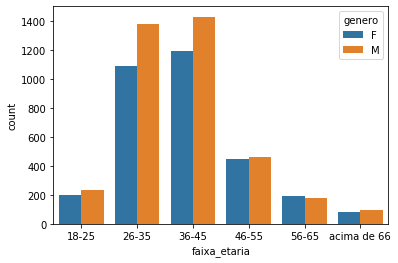

In [18]:
sns.countplot(x="faixa_etaria", hue="genero", data=df)

Através deste grafico conseguimos ver que nossos consumidores se encontram majoritariamente em idades entre 26 e 45 anos, representando 72.77% da nossa base. O que nos parece ser compreensível já que a pessoa nesta faixa etaria tende a ser o responsável por ela e as vezes por outros(família), enquanto os mais jovens as vezes tem ainda os pais como responsáveis e os mais velhos passam a ter os cuidados dos filhos para estes assuntos. 

--

Through this graph We can see that our consumers are mostly aged between 26 and 45 years, account for 72.77% of our base. What seems to us to be understandable, cause the person in this age group tends to be responsible for them and sometimes for others (family), while the younger ones still have their parents as responsible and to the older ones, their children start to take care these matters for them.

### 4) Qual faixa-etária tem maiores pontuações? (What age group has the better score?)

Como já temos os dados separados, vamos ver se em um gráfico nós já conseguimos ter esta resposta. 

--

With the right data, let's see if with a graph, it can bring us the answer. 

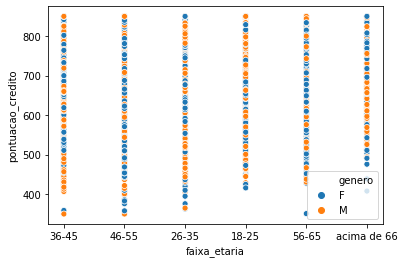

In [19]:
sns.scatterplot(x="faixa_etaria", y="pontuacao_credito", hue="genero", data=df)

In [20]:
df.groupby("faixa_etaria")["pontuacao_credito"].mean().sort_values(ascending=False).round(2)

faixa_etaria
acima de 66    659.80
18-25          654.06
36-45          651.72
26-35          648.26
56-65          646.46
46-55          645.70
Name: pontuacao_credito, dtype: float64

Infelizmente, nosso gráfico não ficou tão visual, a única coisa que podemos ver mais claramente é que a faixa etária 'acima de 66' quase não tem dados nas pontuações mais baixas. 
Então tiramos a média mesmo e ordenamos elas, pois, neste caso, acho que é melhor forma de comparação e o que nos chama atenção é que os grupos extremos (mais velhos e mais novos) possuem as melhores médias, isso pode ser por terem menos observações, ou devido a não terem "tantos compromissos" quanto os outros. Algo que é estranho é que a faixa etária anterior a 'acima de 66' que tem a melhor média, possui a pior. 

--

Unfortunately, our graph isn't visual, the one thing that We can see is that the group 'acima de 66' almost don't have lows ponctuations.
So, We think that take the average and orden them is the better way to anwser our question and what take our attention is that the out groups (the older one and the youger one) has the better average, it can be for they has less observation or for haven't less counts to pay than the others. Something strange is that the group before 'acima de 66' that has the better average, has the worst average then all.

### 5) Qual estado tem a maior media? (Which state has the major mean of all?)

Esta foi a única questão que o desafio inicial da Codenation exigia, portanto, traremos todos os valores de tendência central para comparar. Ordenaremos cada um.

--

This is the only question proposed by the Condenation's challenge, therefore, we will bring all the central tends values to compare. We will put them in order.

In [21]:
media = df.groupby("estado_residencia")["pontuacao_credito"].mean().sort_values(ascending=False).round(2)
media

estado_residencia
RS    651.11
SC    649.54
PR    648.96
Name: pontuacao_credito, dtype: float64

In [22]:
df.groupby("estado_residencia")["pontuacao_credito"].median().sort_values(ascending=False)

estado_residencia
SC    653
RS    650
PR    650
Name: pontuacao_credito, dtype: int64

In [23]:
df.groupby("estado_residencia")["pontuacao_credito"].apply(pd.Series.mode)

estado_residencia   
PR                 0    850
RS                 0    850
SC                 0    850
Name: pontuacao_credito, dtype: int64

In [24]:
df.groupby("estado_residencia")["pontuacao_credito"].std().sort_values().round(2)

estado_residencia
RS    95.14
SC    97.23
PR    98.61
Name: pontuacao_credito, dtype: float64

Olhando todos estes valores, percebemos que há umas proximidade muito grande entre os valores de cada estado, como os valores de tendência central são muito parecidos podemos julgar que eles seguem uma distribuição normal (o que de fato ocorre e pode ser observadono gráfico abaixo). Poderimos até dizer que RS é o estado com melhor pontuação, porém, pode ter sido apenas acaso dos nossos dados e para a àrea de negócio talvez não tenhamos conseguido uma informação tão relevante de diferença entre os estados.

--

This values show us that have a close proximity between the states and how the central tends values are similar We can judge the 'estado_residencia' in each state has a normal distribution (what really happen and can be saw in the graph below). We could say that RS is the state with the better score, but, can be only random and to the business area maybe we don't get a information so relevant about the diference between the states.

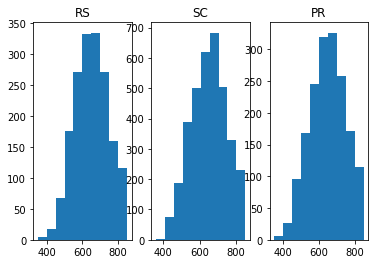

In [25]:
fig, axs = plt.subplots(1,3)

axs[0].set_title("RS")
axs[0].hist(df.query('estado_residencia == "RS"')["pontuacao_credito"])

axs[1].set_title("SC")
axs[1].hist(df.query('estado_residencia == "SC"')["pontuacao_credito"])

axs[2].set_title("PR")
axs[2].hist(df.query('estado_residencia == "PR"')["pontuacao_credito"])

plt.show()

Apenas por curiosidade, vamos fazer essa avaliação também analisando por gênero. 

E, como vemos através da média, homens do RS tem a melhor média, seguido por homens de SC, contudo a menor média também é de SC, mas das mulheres

--

Just for curiosity, let's do the same analysis by gender too. 

And, as We can see through the average, men from RS has the better mean, followed by men from SC, however the less average is from SC too, but of the women.  

In [26]:
df.groupby(["genero","estado_residencia"])["pontuacao_credito"].mean().sort_values(ascending=False).round(2)

genero  estado_residencia
M       RS                   652.23
        SC                   650.76
F       RS                   649.74
M       PR                   649.31
F       PR                   648.57
        SC                   648.07
Name: pontuacao_credito, dtype: float64

### 6) Qual o gênero e estado dos maiores pontuadores? ( Which the gender and state of the customers that has max score?)

In [27]:
score_850 = df.query('pontuacao_credito == 850').sort_values(by=["membro_ativo", "saldo_conta", "nivel_estabilidade"])
score_850

,id,pontuacao_credito,estado_residencia,genero,idade,nivel_estabilidade,saldo_conta,numero_produtos,possui_cartao_de_credito,membro_ativo,faixa_etaria
2550,2576bd5fb3030608469880e743262f43897a81a0,850,SC,M,42,0,0.00,2,1,0,36-45
5380,6adc679884b7808227b483f2b2255df44350c668,850,RS,M,36,0,0.00,2,1,0,36-45
3774,77a2a54e487a14cb60d574a192341468da6aa9ff,850,SC,M,61,1,0.00,1,1,0,56-65
3918,15c83ac6f6c13a67cfb671a7d5a5ea36027961cd,850,SC,M,29,1,0.00,2,0,0,26-35
5663,d804c7f29b612e448a1c8910219a526fc25b3cb8,850,SC,F,38,2,0.00,2,1,0,36-45
...,...,...,...,...,...,...,...,...,...,...,...
1164,9c53560aff23f1d0512844168e20b6d3f0fd2b3e,850,SC,F,36,0,164850.54,1,1,1,36-45
2651,699a2e173e71ae27ae7b09d0ca97f5f97b080359,850,PR,M,40,4,166082.15,2,0,1,36-45
4674,631d97f5beb62957142c1236017f7ff4aab85668,850,PR,M,41,1,176958.46,2,0,1,36-45
4533,c447e6f8d4c22e56157c76bd384a02b9cd07685a,850,RS,M,39,6,206014.94,2,0,1,36-45


In [28]:
score_850.groupby(["genero", "estado_residencia"])["pontuacao_credito"].value_counts().sort_values(ascending=False)

genero  estado_residencia  pontuacao_credito
M       SC                 850                  45
F       SC                 850                  33
M       PR                 850                  26
        RS                 850                  21
F       RS                 850                  21
        PR                 850                  21
Name: pontuacao_credito, dtype: int64

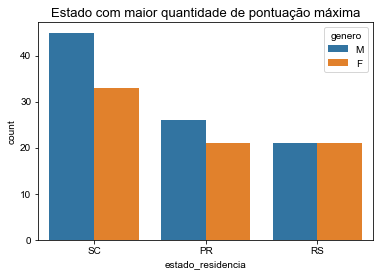

In [29]:
sns.countplot(x="estado_residencia", hue="genero", data=score_850, order = score_850['estado_residencia'].value_counts().index)
sns.set(style="whitegrid", palette="Paired", font_scale=1.1, rc={"figure.figsize": [12,5]})
plt.title("Estado com maior quantidade de pontuação máxima")
plt.show()

SC tem a maioria dos consumidores com pontuação maxima, chegando a ser - no caso dos homens de SC - o dobro de consumidores em relação ao RS e as mulheres do PR e isso é algo que poderia ser melhor investigado para entender como consumidores de SC tem tido mais valores máximos. 

--

SC has the most customers with max score, in this case, the quantity of men from SC is twice than RS and the women from PR and this is something that could be better investigated to understand how SC consumers have had more maximum values.

### 8) Membros ativos tem pontuação melhor que inativos? (Active member has better score than inactive members?)

Segundo a nossa análise inicial de correlação entre os valores, entendemos que a variável 'membro_ativo' tem uma relavância alta, mas será que existe uma diferença tão grande entre as pontuações dos membros ativos e dos inativos?

--

According the beginning of our analysis, when we saw the correlation between the variables, We understand that ''membro_ativo' has a high relevance,  but is there such a big difference between the scores of active and inactive members?

In [30]:
df.groupby("membro_ativo")["pontuacao_credito"].mean().sort_values(ascending=False).round(2)

membro_ativo
1    653.01
0    646.41
Name: pontuacao_credito, dtype: float64

In [31]:
df.groupby("membro_ativo")["pontuacao_credito"].median().sort_values(ascending=False).round(2)

membro_ativo
1    654
0    648
Name: pontuacao_credito, dtype: int64

Se levarmos em consideração que as outras comparações que fizemos não tiveram tantas diferenças, podemos considerar que está possui, entretando não acredito que nos dê embasamento suficiente para afirmar que é o que de fato divide os consumidores entre bons e ruins. 

--

If We take into account the other comparisons We made did has so many differences, We can considerer that it is, but, I don't believe that it is enough to conclude that 'membros_ativos' is what divide customers between good and bad.

## Conclusões finais (Final conclusions)

Depois de toda esta nossa análise, podemos concluir que não temos grandes conclusões sobre estes nossos dados. Sim, isso pode acontecer, rs (após longa análise, entender que nada deu certo ou que está tudo errado, ou que não temos dados suficientes para chegar a conclusões que nos dêem embasamento para tomar decisões). 
O que indico neste caso é novamente conversar com a àrea de negócio e diante destes dados, propor fazer a mesma análise com uma nova base, tentar levantar novas hipóteses, tentar entender melhor a escala dos valores, pois, o que a princípio não parece ser uma grande diferença (ex.: 2 pontos de diferença entre as médias) talvez tenham de fato uma grande relevância e que nos levará a investigar melhor além dos dados o que os causou e o que poderá ser feito a partir disto. 

--

After all our analysis, we can conclude that we haven't great conclusions about this data. Yes, it can happens, rs (after a deep analysis, understand that nothing got right or everything is wrong or we haven't enough data to support take decisions).
What We indicate in this case is talk again with the business area and propose do the same analysis with other dataset, try take another hypotesis, try understand the values scale, because what can be seem as a low differrence (ex.: 2 points of difference between the mean values) might present a great relevance and what will lead us to a better investigantion byond the data, what cause them and what can be done from this. 

## Obrigado
Contato:

**Gustavo Sousa**

(21) 98010-7576

gustavosousash@gmail.com

LinkedIn: https://www.linkedin.com/in/gustavosousash/

Portfólio: https://github.com/gustavoshalom/Data-Science/blob/master/README.md